<Figure size 1200x800 with 0 Axes>

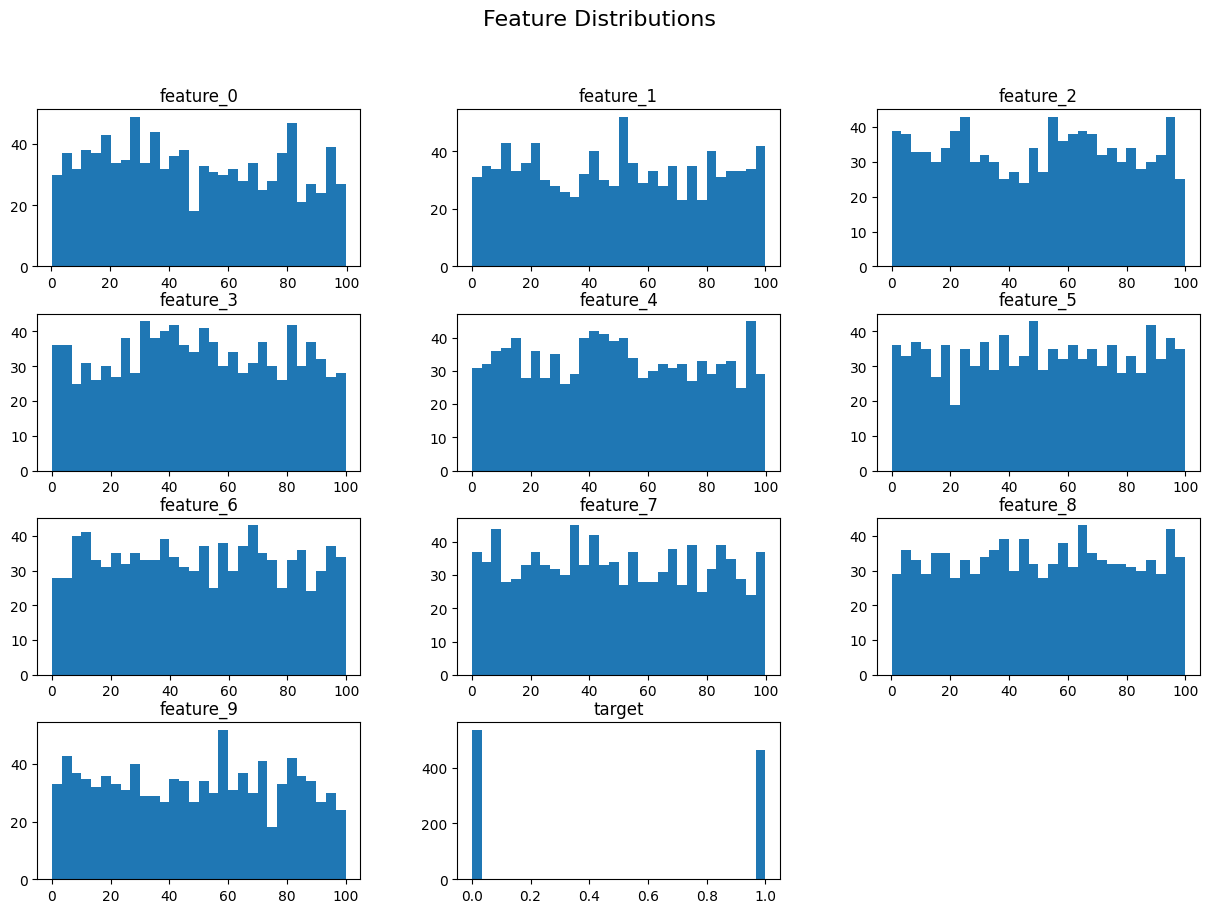

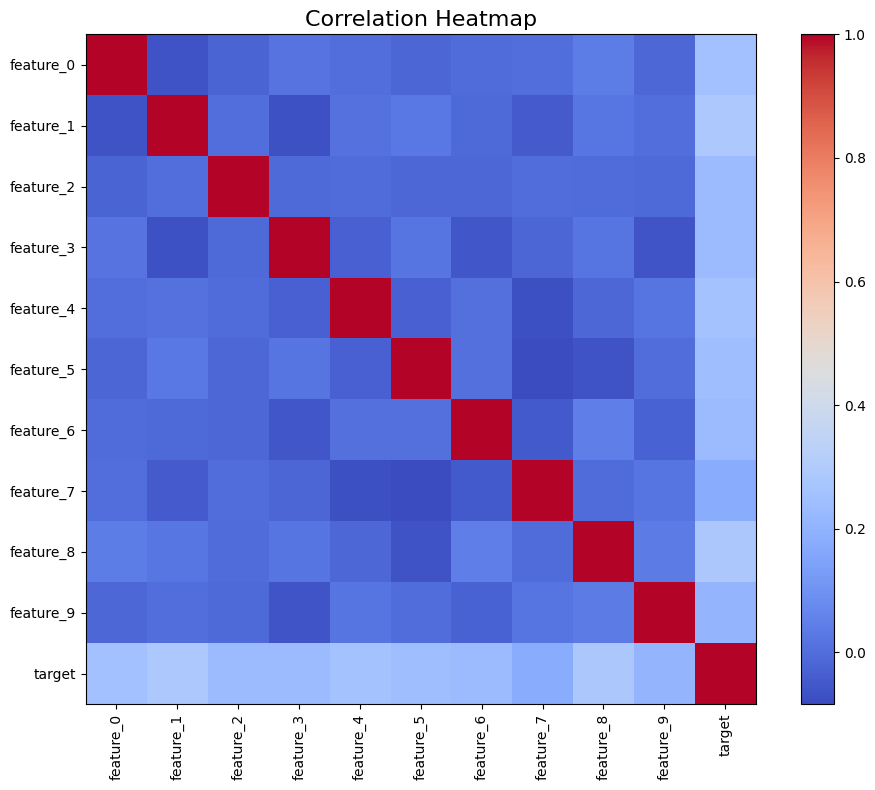

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       116
           1       0.86      0.88      0.87        84

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200

AUC: 0.888752052545156


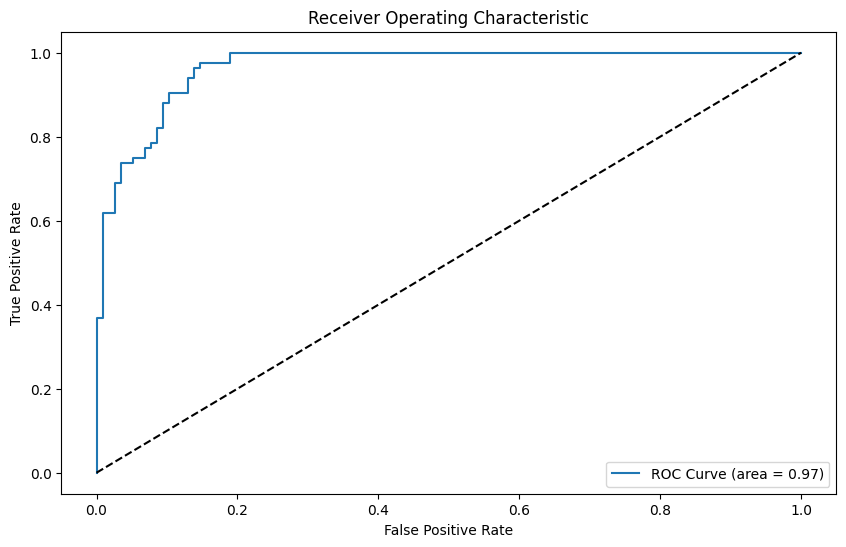

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Load the dataset from a CSV file
data = pd.read_csv('/content/synthetic_dataset.csv')

# Assuming the last column is the target variable
X = data.iloc[:, :-1]  # All columns except the last one as features
y = data.iloc[:, -1]   # The last column as the target

# Visualize feature distributions
plt.figure(figsize=(12, 8))
data.hist(bins=30, figsize=(15, 10), grid=False)
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

# Visualize correlation heatmap using only matplotlib
correlation = data.corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(ticks=np.arange(len(correlation.columns)), labels=correlation.columns, rotation=90)
plt.yticks(ticks=np.arange(len(correlation.columns)), labels=correlation.columns)
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Best model and evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # Get probabilities for ROC curve

# Print the classification report and AUC score
print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))

# Visualize ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_prob))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
